In [1]:
import numpy as np 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib._color_data as mcd
import seaborn as sns
%matplotlib inline


In [2]:
data = {}

data['circuits'] = pd.read_csv('Formula1_data/circuits.csv')
#Id, reference name, name, loc
data['constructor_results'] = pd.read_csv('Formula1_data/constructor_results.csv')
#constuctorId, raceId, points
data['constructor_standings'] = pd.read_csv('Formula1_data/constructor_standings.csv')
#stanidingsId, raceId, constructorId, points, position, wins
data['constructors'] = pd.read_csv('Formula1_data/constructors.csv')
#id, name, nationality
data['driver_standings'] = pd.read_csv('Formula1_data/driver_standings.csv')
#id, raceId, driverId, points, position, wins
data['drivers'] = pd.read_csv('Formula1_data/drivers.csv')
#id, name, number, DOB and other detaiils
data['lap_times'] = pd.read_csv('Formula1_data/lap_times.csv')
#raceId, DriverID, lap, pooision, time
data['pit_stops'] = pd.read_csv('Formula1_data/pit_stops.csv')
#raceId, driverID, stop number, time, duration
data['qualifying'] = pd.read_csv('Formula1_data/qualifying.csv')
#qualiId, raceId, driverId, constructorId, number, position, times (3 qualifying)
data['races'] = pd.read_csv('Formula1_data/races.csv')
#Id, year, round, circuitId, name, date, time
data['results'] = pd.read_csv('Formula1_data/results.csv')
#resultId, raceId, driverId, ConstructorId, number, grid, position, position order, points. laps, time, fastest lap time, fastest lap speed
data['status'] = pd.read_csv('Formula1_data/status.csv')
#statusId, status(finished, dsq, engine issue etc.)

In [3]:
allTimeDriverResults = {}

In [4]:
for i in range(len(data['drivers'])):
    allTimeDriverResults[data['drivers'].loc[i]['forename']+' '+data['drivers'].loc[i]['surname']] = dict(data['results'][data['results'].driverId == data['drivers'].loc[i]['driverId']]['position'].value_counts())

In [5]:
def getPointsRaces(driver):
    points, races = 0, 0
    for i in driver.keys():
        races+=driver[i]
        if i == '1':
            points+=25*driver[i]
        elif i == '2':
            points+=18*driver[i]
        elif i == '3':
            points+=15*driver[i]
        elif i == '4':
            points+=12*driver[i]
        elif i == '5':
            points+= 10*driver[i]
        elif i == '6':
            points+= 8*driver[i]
        elif i == '7':
            points+= 6*driver[i]
        elif i == '8':
            points+= 4*driver[i]
        elif i == '9':
            points+= 2*driver[i]
        elif i == '10':
            points+= 1*driver[i]
        else:
            points+=0

        try:
            rwr = races - driver['\\N']
        except:
            rwr = races

    return (points, races, rwr)

In [6]:
allTimePointsRacesRwr = {}
for i in allTimeDriverResults.keys():
    allTimePointsRacesRwr[i] = getPointsRaces(allTimeDriverResults[i])

In [7]:
allTime = pd.DataFrame(allTimePointsRacesRwr).transpose()

In [8]:
allTime.columns = ['Points', 'Races', 'Non-DNF_races']

In [9]:
allTime.sort_values(by = 'Points', ascending= False, axis = 0, inplace=True)

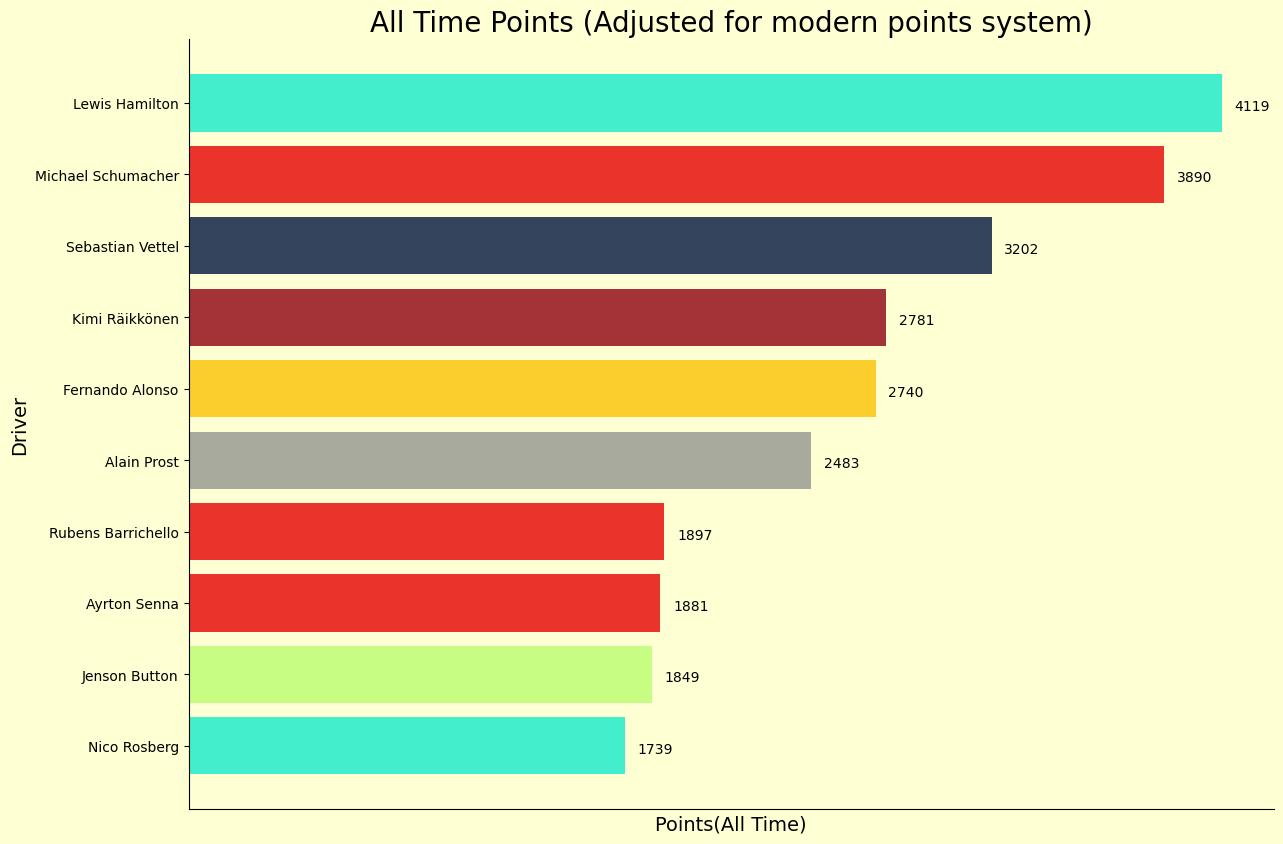

In [10]:
mpl.style.use('default')
plt.figure(figsize=[14, 10], facecolor = 'xkcd:eggshell')
plt.barh(list(allTime.head(10).index)[::-1], list(allTime.head(10).Points)[::-1], color = ['xkcd:aqua', 'xkcd:red', 'xkcd:navy', 'xkcd:crimson', 'xkcd:goldenrod', 'xkcd:grey', 'xkcd:red', 'xkcd:red', '#B8FD6E', 'xkcd:aqua'][::-1], alpha=0.8, zorder = 0.5)
plt.xticks([])
plt.title('All Time Points (Adjusted for modern points system)', fontsize = 20)
plt.xlabel('Points(All Time)', fontsize = 14)
plt.ylabel('Driver', fontsize = 14)
plt.annotate('4119', (4169, 8.9))
plt.annotate('3890', (3940, 7.9))
plt.annotate('3202', (3252, 6.9))
plt.annotate('2781', (2831, 5.9))
plt.annotate('2740', (2790, 4.9))
plt.annotate('2483', (2533, 3.9))
plt.annotate('1897', (1947, 2.9))
plt.annotate('1881', (1931, 1.9))
plt.annotate('1849', (1899, 0.9))
plt.annotate('1739', (1789, -.1))
ax = plt.gca()
ax.set_facecolor('xkcd:eggshell')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('atp.jpg')
plt.show()


In [11]:
allTime['ppr'] = allTime['Points']/allTime['Races']
allTime['pprwr'] = allTime['Points']/allTime['Non-DNF_races']

In [12]:
atppr = allTime.sort_values(by = 'ppr', ascending= False, axis = 0)
atpprwr = allTime.sort_values(by = 'pprwr', ascending= False, axis = 0)

In [13]:
atppr = atppr[atppr.Races>=25]

In [14]:
atpprwr = atpprwr[atpprwr.Races>=25]

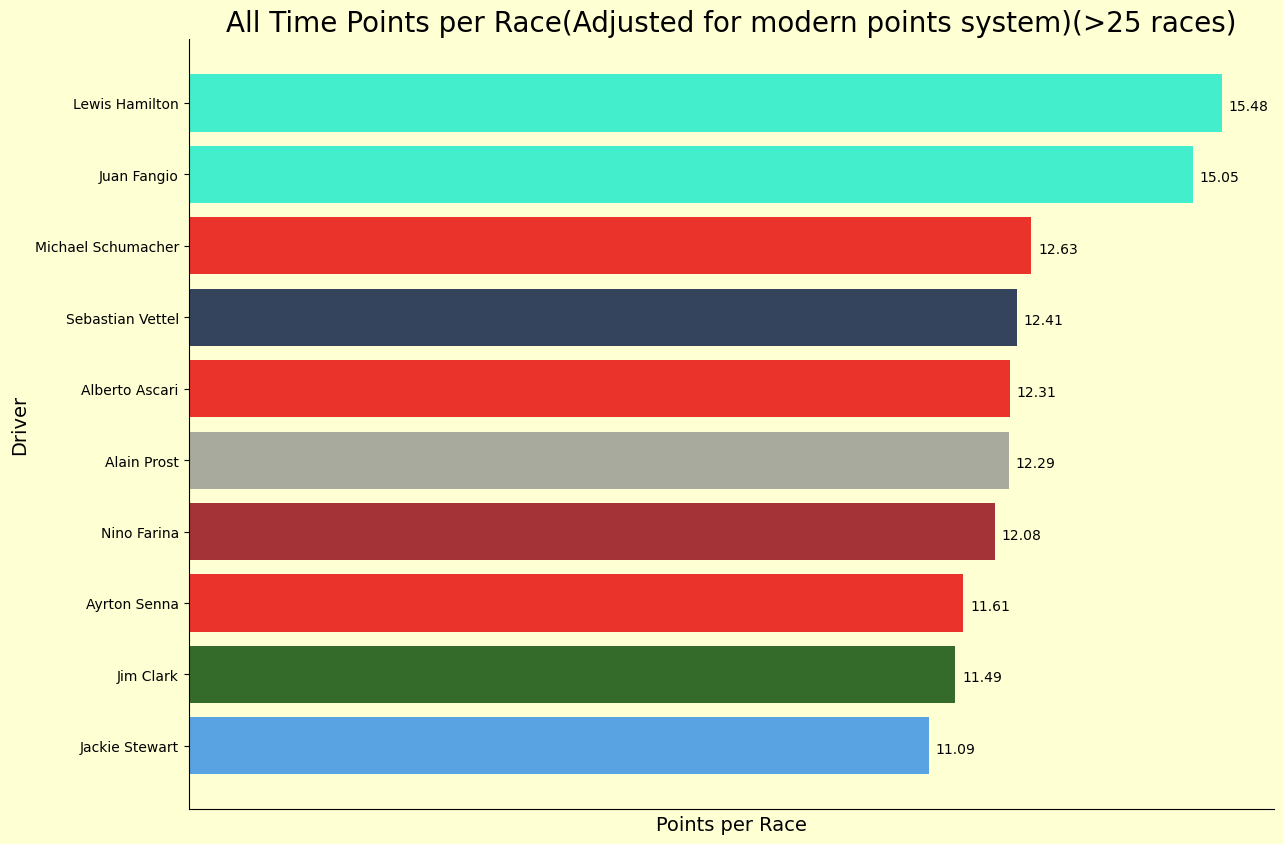

In [15]:
mpl.style.use('default')
plt.figure(figsize=[14, 10], facecolor = 'xkcd:eggshell')
plt.barh(list(atppr.head(10).index)[::-1], list(atppr.head(10).ppr)[::-1], color = ['xkcd:aqua', 'xkcd:aqua', 'xkcd:red', 'xkcd:navy', 'xkcd:red', 'xkcd:grey', 'xkcd:crimson', 'xkcd:red', 'xkcd:racing green', '#318CE7'][::-1], alpha=0.8, zorder = 0.5)
plt.xticks([])
plt.title('All Time Points per Race(Adjusted for modern points system)(>25 races)', fontsize = 20)
plt.xlabel('Points per Race', fontsize = 14)
plt.ylabel('Driver', fontsize = 14)
plt.annotate('15.48', (15.58, 8.9))
plt.annotate('15.05', (15.15, 7.9))
plt.annotate('12.63', (12.73, 6.9))
plt.annotate('12.41', (12.51, 5.9))
plt.annotate('12.31', (12.41, 4.9))
plt.annotate('12.29', (12.39, 3.9))
plt.annotate('12.08', (12.18, 2.9))
plt.annotate('11.61', (11.71, 1.9))
plt.annotate('11.49', (11.59, 0.9))
plt.annotate('11.09', (11.19, -.1))

ax = plt.gca()
ax.set_facecolor('xkcd:eggshell')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('atppr.jpg')
plt.show()


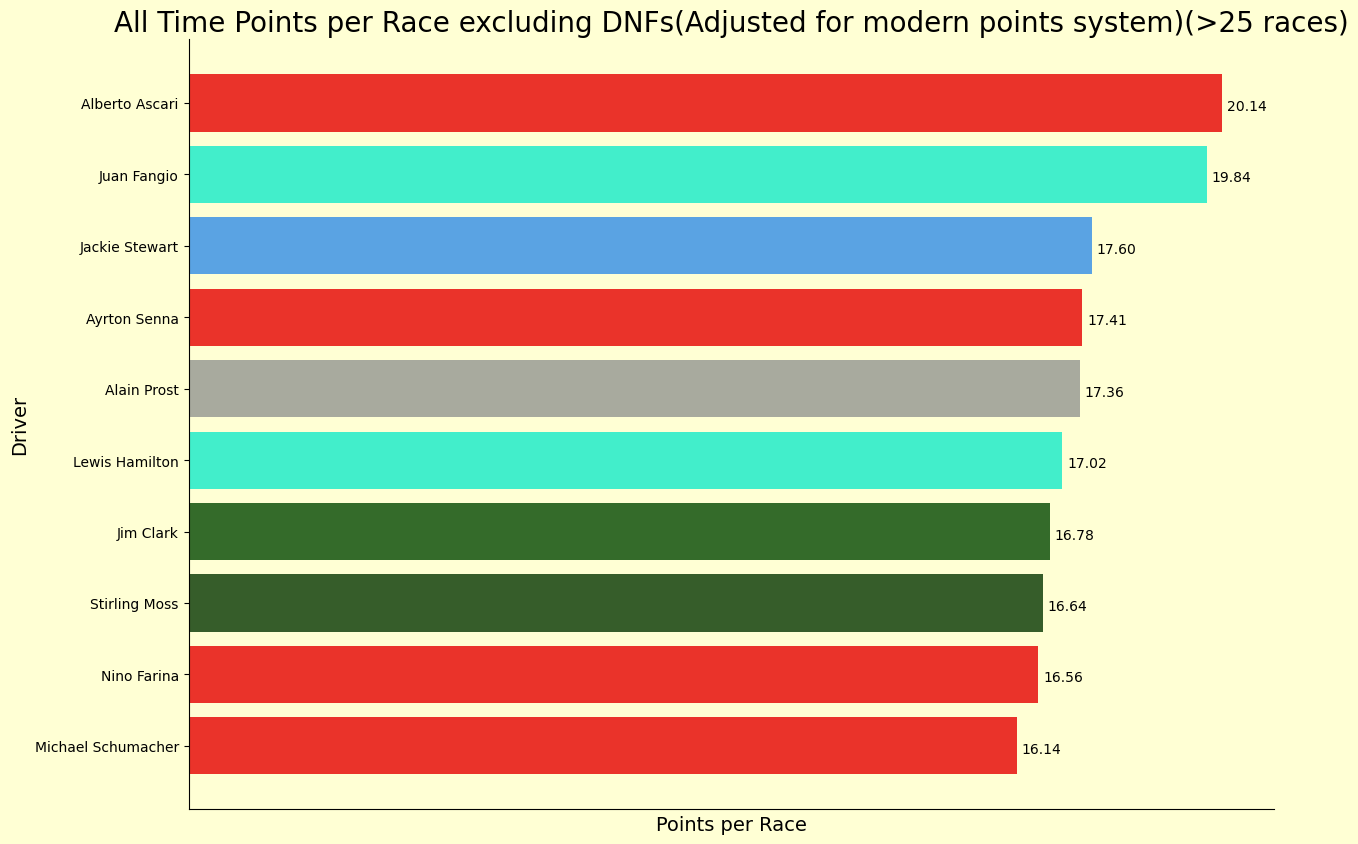

In [16]:
mpl.style.use('default')
plt.figure(figsize=[14, 10], facecolor = 'xkcd:eggshell')
plt.barh(list(atpprwr.head(10).index)[::-1], list(atpprwr.head(10).pprwr)[::-1], color = ['xkcd:red', 'xkcd:aqua', '#318CE7', 'xkcd:red', 'xkcd:grey', 'xkcd:aqua', 'xkcd:racing green', 'xkcd:dark green', 'xkcd:red', 'xkcd:red'][::-1], alpha=0.8, zorder = 0.5)
plt.xticks([])
plt.title('All Time Points per Race excluding DNFs(Adjusted for modern points system)(>25 races)', fontsize = 20)
plt.xlabel('Points per Race', fontsize = 14)
plt.ylabel('Driver', fontsize = 14)
plt.annotate('20.14', (20.24, 8.9))
plt.annotate('19.84', (19.94, 7.9))
plt.annotate('17.60', (17.70, 6.9))
plt.annotate('17.41', (17.51, 5.9))
plt.annotate('17.36', (17.46, 4.9))
plt.annotate('17.02', (17.12, 3.9))
plt.annotate('16.78', (16.88, 2.9))
plt.annotate('16.64', (16.74, 1.9))
plt.annotate('16.56', (16.66, 0.9))
plt.annotate('16.14', (16.24, -.1))

ax = plt.gca()
ax.set_facecolor('xkcd:eggshell')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('atpprwr.jpg')
plt.show()


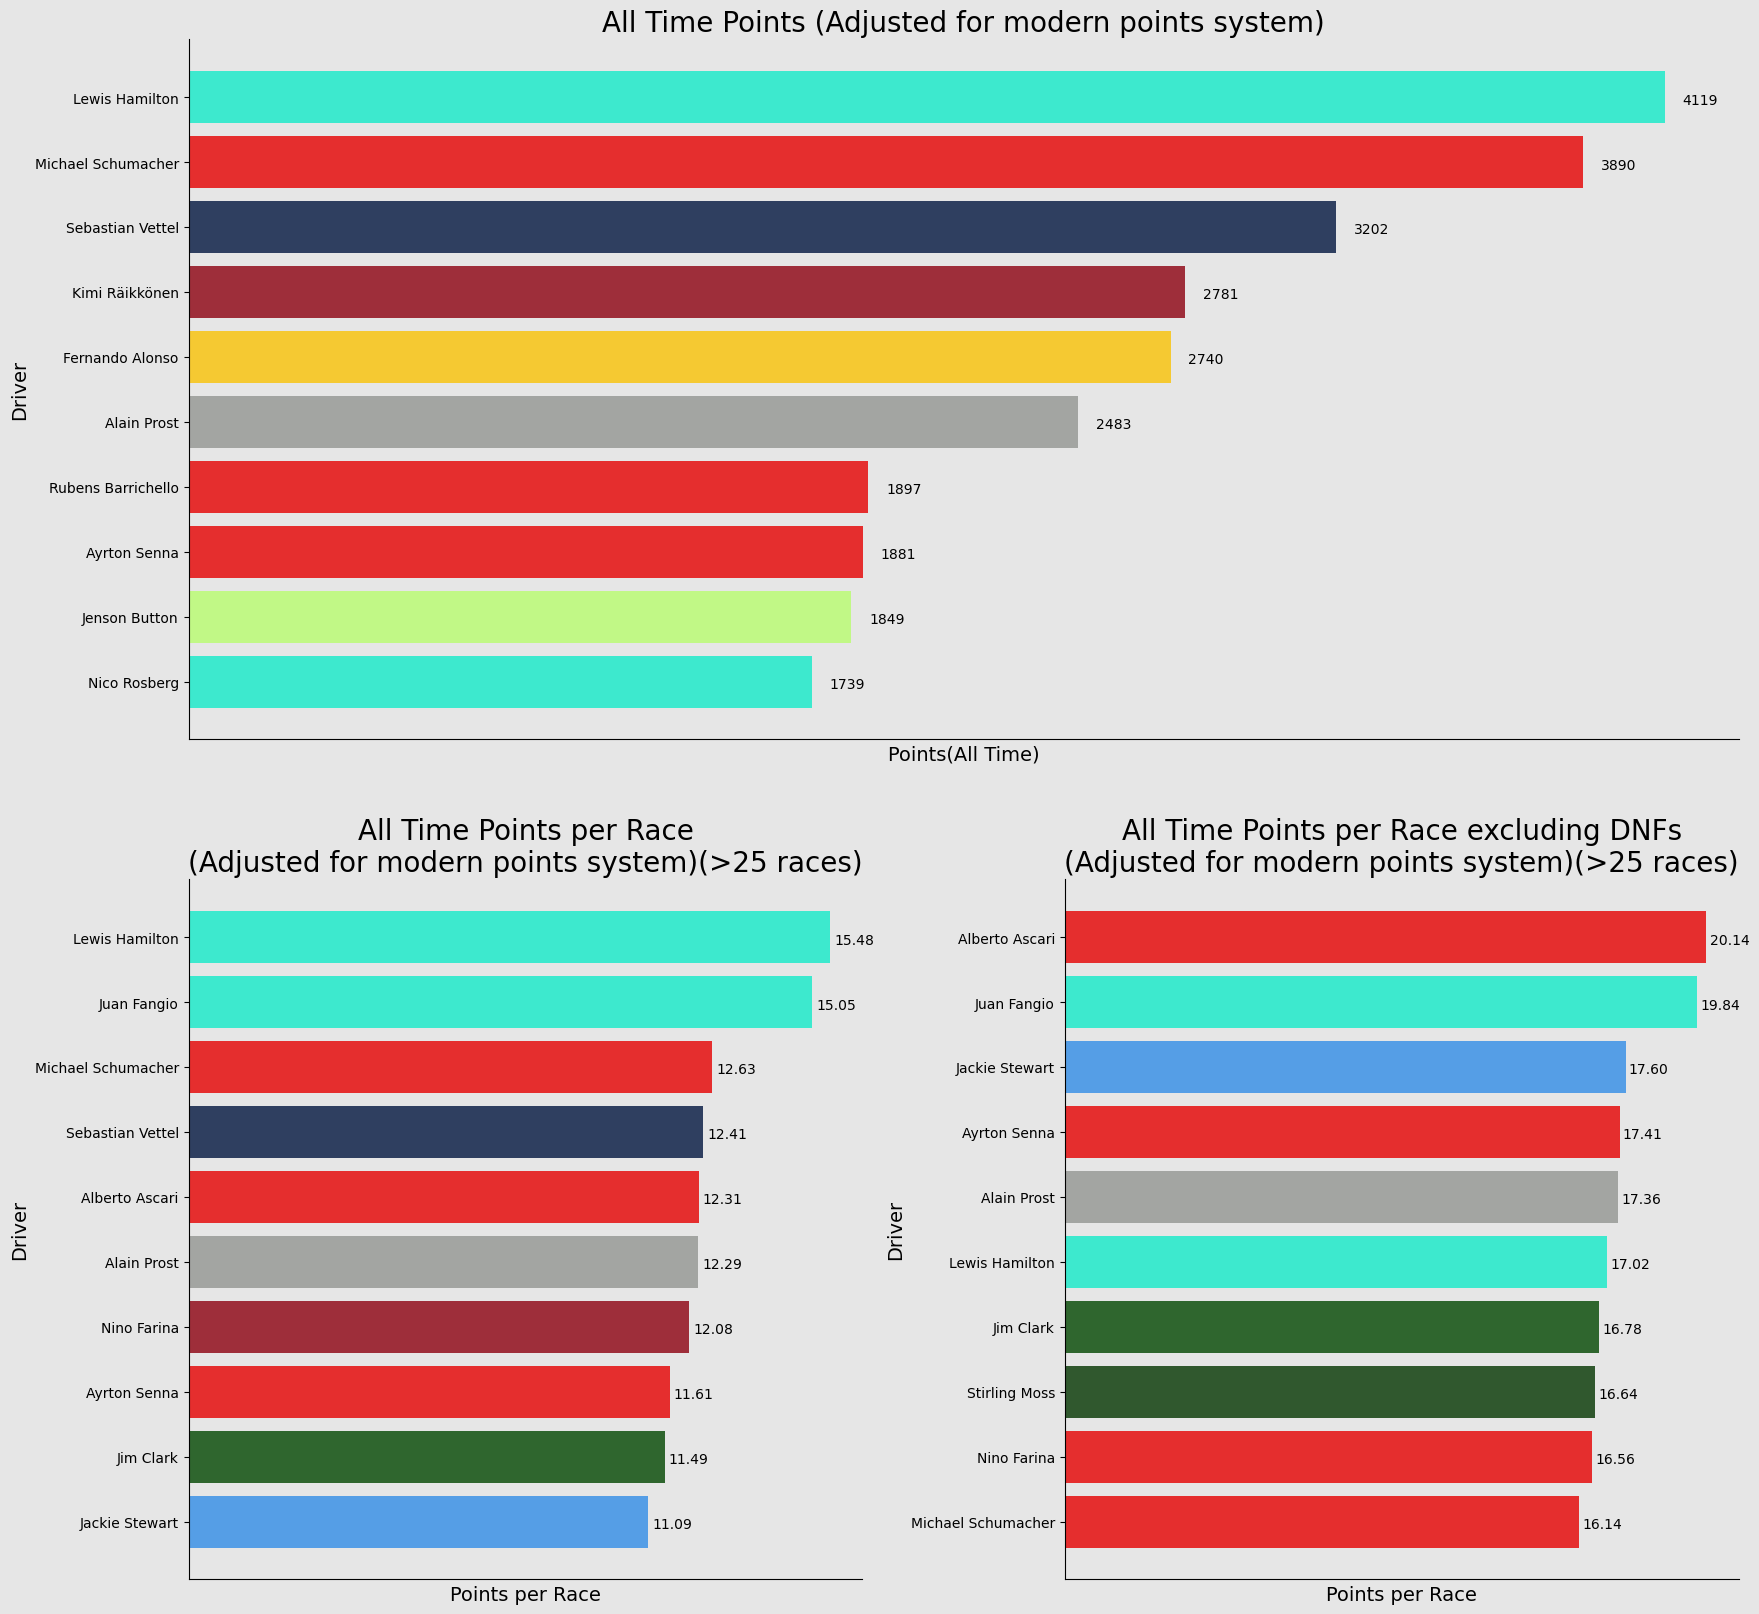

In [17]:
colour = '#e6e6e6'
fig = plt.figure(figsize=(20, 20), facecolor = colour)
gs = plt.GridSpec(2, 2, wspace=0.3, hspace=0.2)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])



ax0.barh(list(allTime.head(10).index)[::-1], list(allTime.head(10).Points)[::-1], color = ['xkcd:aqua', 'xkcd:red', 'xkcd:navy', 'xkcd:crimson', 'xkcd:goldenrod', 'xkcd:grey', 'xkcd:red', 'xkcd:red', '#B8FD6E', 'xkcd:aqua'][::-1], alpha=0.8, zorder = 0.5)
ax0.set_xticks([])
ax0.set_title('All Time Points (Adjusted for modern points system)', fontsize = 20)
ax0.set_xlabel('Points(All Time)', fontsize = 14)
ax0.set_ylabel('Driver', fontsize = 14)
ax0.annotate('4119', (4169, 8.9))
ax0.annotate('3890', (3940, 7.9))
ax0.annotate('3202', (3252, 6.9))
ax0.annotate('2781', (2831, 5.9))
ax0.annotate('2740', (2790, 4.9))
ax0.annotate('2483', (2533, 3.9))
ax0.annotate('1897', (1947, 2.9))
ax0.annotate('1881', (1931, 1.9))
ax0.annotate('1849', (1899, 0.9))
ax0.annotate('1739', (1789, -.1))

ax0.spines['top'].set_color('none')
ax0.spines['right'].set_color('none')




ax1.barh(list(atppr.head(10).index)[::-1], list(atppr.head(10).ppr)[::-1], color = ['xkcd:aqua', 'xkcd:aqua', 'xkcd:red', 'xkcd:navy', 'xkcd:red', 'xkcd:grey', 'xkcd:crimson', 'xkcd:red', 'xkcd:racing green', '#318CE7'][::-1], alpha=0.8, zorder = 0.5)
ax1.set_xticks([])
ax1.set_title('All Time Points per Race\n(Adjusted for modern points system)(>25 races)', fontsize = 20)
ax1.set_xlabel('Points per Race', fontsize = 14)
ax1.set_ylabel('Driver', fontsize = 14)
ax1.annotate('15.48', (15.58, 8.9))
ax1.annotate('15.05', (15.15, 7.9))
ax1.annotate('12.63', (12.73, 6.9))
ax1.annotate('12.41', (12.51, 5.9))
ax1.annotate('12.31', (12.41, 4.9))
ax1.annotate('12.29', (12.39, 3.9))
ax1.annotate('12.08', (12.18, 2.9))
ax1.annotate('11.61', (11.71, 1.9))
ax1.annotate('11.49', (11.59, 0.9))
ax1.annotate('11.09', (11.19, -.1))

ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')


ax2.barh(list(atpprwr.head(10).index)[::-1], list(atpprwr.head(10).pprwr)[::-1], color = ['xkcd:red', 'xkcd:aqua', '#318CE7', 'xkcd:red', 'xkcd:grey', 'xkcd:aqua', 'xkcd:racing green', 'xkcd:dark green', 'xkcd:red', 'xkcd:red'][::-1], alpha=0.8, zorder = 0.5)
ax2.set_xticks([])
ax2.set_title('All Time Points per Race excluding DNFs\n(Adjusted for modern points system)(>25 races)', fontsize = 20)
ax2.set_xlabel('Points per Race', fontsize = 14)
ax2.set_ylabel('Driver', fontsize = 14)
ax2.annotate('20.14', (20.24, 8.9))
ax2.annotate('19.84', (19.94, 7.9))
ax2.annotate('17.60', (17.70, 6.9))
ax2.annotate('17.41', (17.51, 5.9))
ax2.annotate('17.36', (17.46, 4.9))
ax2.annotate('17.02', (17.12, 3.9))
ax2.annotate('16.78', (16.88, 2.9))
ax2.annotate('16.64', (16.74, 1.9))
ax2.annotate('16.56', (16.66, 0.9))
ax2.annotate('16.14', (16.24, -.1))


ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')

ax0.set_facecolor(colour)
ax1.set_facecolor(colour)
ax2.set_facecolor(colour)
plt.savefig('alltimestats.jpg')
plt.show()